# The process of  learning hash table

哲學四 05113010 陳鳳庭

## Content
- [Hash Table原理](http://localhost:8888/notebooks/Data%20%20structures%20and%20Algorithms/The%20process%20of%20%20learning%20hash%20table.ipynb#Hash-Table%E5%8E%9F%E7%90%86)
- [Hash function原理](http://localhost:8888/notebooks/Data%20%20structures%20and%20Algorithms/The%20process%20of%20%20learning%20hash%20table.ipynb#Hash-function%E5%8E%9F%E7%90%86)
- [設計程式碼](http://localhost:8888/notebooks/Data%20%20structures%20and%20Algorithms/The%20process%20of%20%20learning%20hash%20table.ipynb#%E8%A8%AD%E8%A8%88%E7%A8%8B%E5%BC%8F%E7%A2%BC)
- [流程圖](http://localhost:8888/notebooks/Data%20%20structures%20and%20Algorithms/The%20process%20of%20%20learning%20hash%20table.ipynb#%E6%B5%81%E7%A8%8B%E5%9C%96)
- [參考資料](http://localhost:8888/notebooks/Data%20%20structures%20and%20Algorithms/The%20process%20of%20%20learning%20hash%20table.ipynb#%E5%8F%83%E8%80%83%E8%B3%87%E6%96%99)

----

### Hash Table原理

> 結合array與linked list

Hash Table的資料結構，是將input（key）透過Hash function進行轉換，讓原本的input能夠進行數學運算，再以數學運算的結果決定其存入array中的位置（index），若array中已有資料存在，就在已存在的資料後面再創造一個空間，也就是存入array中的是一條linked list，linked lsit中的每個node就是依序放入array中的資料

在此次做作業裡，作的數學運算是將轉換後的編碼除以array的長度，再取餘數作為array的index（以array長度為5作範例）：
    
    encoding % 5 = 0 → array[0]
    encoding % 5 = 1 → array[1]
    encoding % 5 = 2 → array[2]
    encoding % 5 = 3 → array[3]
    encoding % 5 = 4 → array[4]

---

### Hash function原理

Hash function是將input轉換為單一編碼的方程式
   - input可以是字串也可以是數字（在此次作業input皆設定為字串）
   - 轉換後的編碼是可以進行數學運算的
   - 轉換使用的方程式是密碼學，它是透過數學運算或是邏輯運算而得到的

在此次作業使用的hash function是MD5，其會先有一組初始值（非input）進行邏輯運算，再將input帶入，將其轉換為十六進位編碼，再轉成二進位去作邏輯運算，之後湊出編碼

理想中的Hash function有幾個特性：
   - 唯一值：不同的input不可能產生相同的hash value（Hash function的output），相同的input只會產生相同的hash value
   - 高速：產生hash value的速度要快
   - 安全：修改困難（修改 == input改變，hash value改變）
   

---

### 設計程式碼

#### 先試試看套件如何操作

In [27]:
from Crypto.Hash import MD5

In [9]:
h = MD5.new()

In [10]:
print(h.hexdigest())

d41d8cd98f00b204e9800998ecf8427e


In [96]:
h = MD5.new()
h.update("5".encode('utf-8'))
print(h.hexdigest())
print(int(h.hexdigest(), 16)%3)

e4da3b7fbbce2345d7772b0674a318d5
0


In [22]:
h.update("5".encode('utf-8'))
print(h.hexdigest())

6074c6aa3488f3c2dddff2a7ca821aab


In [434]:
h = MD5.new("6".encode('utf-8'))
print(h)
print(h.hexdigest())

1679091c5a880faf6fb5e6087eb1b2dc


In [40]:
a = int(h.hexdigest(), 16)
print(a)
print(a%5)

29871468615243985478486908056489800412
2


測試一下作業格式

In [438]:
a = [None]*5

In [439]:
print(len(a))
type(a)

5


list

如果index不存在array中，會出現此Error

In [440]:
a[0] = 2
a[1] = 3
a[2] = 4
a[3] = 5
a[4] = 6
a[5] = 35 #👈🏻

IndexError: list assignment index out of range

In [69]:
a

[2, 3, 4, 5, 6]

#### 開始設計原始碼

遇到問題：如何將linked list放到array中 → 複習一下老師課堂上live coding的講解

In [1]:
class ListNode:
    def __init__(self, val):
        self.val = val
        self.next = None
        """
        :type val: int
        :type next: ListNode
        :rtype: None        
        """

In [428]:
class MyHashSet:
    def __init__(self, capacity=5):
        self.capacity = capacity
        self.data = [None] * capacity
        """
        :type capacity: int
        :rtype: None
        """
    def add(self, key):
        """
        :type key: str
        :rtype: None
        """
        
        capacity = self.capacity
        encoding_key, index = self.Encoding_MD5(key, capacity)
        
        if self.data[index] == None:
            self.data[index] = ListNode(encoding_key)
        else:
            node = self.data[index]
            while node.next != None:
                if node.val == encoding_key:
                    print(dob)
                    return
                node = node.next
            a = node
            node.next = ListNode(encoding_key)
            
        print(encoding_key, index)
            
        return
    
        
    def Encoding_MD5(self, key:str, capacity:int):
        encoding = MD5.new(key.encode('utf-8'))
        encoding_key = int(encoding.hexdigest(), 16)
        index = int(encoding.hexdigest(), 16) % capacity
        return encoding_key, index
    
    def remove(self, key):
        """
        :type key: str
        :rtype: None
        """
        
        capacity = self.capacity
        encoding_key, index = self.Encoding_MD5(key, capacity)
        
        if encoding_key == self.data[index].val:
            if self.data[index].next == None:
                self.data[index] = None
            else:
                self.data[index] = self.data[index].next
        else:
            node = self.data[index]
            pre_node = node
            while node.val != encoding_key:
                pre_node = node
                node = node.next

            pre_node.next = node.next
        return
                
    def contains(self, key):
        """
        :type key: str
        :rtype: bool(True or False)
        """
        
        capacity = self.capacity
        encoding_key, index = self.Encoding_MD5(key, capacity)
        
        node = self.data[index]
        while node != None:
            if node.val == encoding_key:
                return True
            else:
                node = node.next
        return False

測試程式碼是否如預期執行

In [429]:
b = MyHashSet()

In [430]:
c = b.add('7')

190188081314515644627836686569786975555 0


In [431]:
c = b.add('6')

29871468615243985478486908056489800412 2


In [432]:
c = b.add('4')

223974724102701384270894320508706361900 0


In [433]:
c = b.add('6')

29871468615243985478486908056489800412 2


In [410]:
c = b.add('3')

In [411]:
b.remove("2")

AttributeError: 'NoneType' object has no attribute 'val'

In [380]:
b.contains("2")

False

將套件的使用另包函式

In [442]:
# 編碼函式
def Encoding_MD5(key:str, capacity:int):
    encoding = MD5.new(key.encode('utf-8'))
    encoding_key = int(encoding.hexdigest(), 16)
    index = int(encoding.hexdigest(), 16) % capacity
    return encoding_key, index

測試

In [435]:
value, index = Encoding_MD5('6', 5)
print(value, index)

29871468615243985478486908056489800412 2


In [2]:
list = [None]*5

In [181]:
# node = a[index]

while node:
    node1 = node
    node = node.next
    node1.next = node
    print(1)
    
# node = ListNode(value)
# print(node.val)

1


In [10]:
list[0] = a

if list[0] != None:
    print(2)

2


In [8]:
a = ListNode(3)
b = ListNode(2)
c = ListNode(5)
d = ListNode(4)
a.next = b
b.next = c
c.next = d

In [305]:
print(b.next)

In [416]:
list[1] = a
print(list[1] == None)
type(a.val)

False


int

In [338]:
val = 5

In [339]:
test = list[1]
while test.val != val:
    pre_test = test
    test = test.next

pre_test.next = test.next
    
print(pre_test.val, test.val)

2 5


In [344]:
list[1].next.next.next.val

AttributeError: 'NoneType' object has no attribute 'val'

測試之後，發現remove沒有移除成功，調整一下 → 刪除值為linked list的第一個值時會失敗

In [ ]:
def remove(self, key):
        """
        :type key: str
        :rtype: None
        """
        
        capacity = self.capacity
        encoding_key, index = self.Encoding_MD5(key, capacity)
        
        node = self.data[index]   #👈🏻，增加刪除值在linked list第一個的判斷
        pre_node = node
        while node.val != encoding_key:
            pre_node = node
            node = node.next
            
        pre_node.next = node.next
        return

測試之後，發現add有部分需要修改，調整一下 → 設計為：若遇到相同值則不儲存直接返回，但在測試時發現，當存入的值與第一個值相同時，仍會存入

In [ ]:
def add(self, key):
        """
        :type key: str
        :rtype: None
        """
        
        capacity = self.capacity
        encoding_key, index = self.Encoding_MD5(key, capacity)
        
        node = self.data[index]   # 👈🏻，位置放錯，調整一下，再增加其他判斷式
        if node == None:
            self.data[index] = ListNode(encoding_key)
        else:
            while node.next != None:
                if node.next.val == encoding_key:
                    return
                node = node.next
            node.next = ListNode(encoding_key) 
        return

在LeetCode測試後，出現RuntimeError，調整一下

In [ ]:
def remove(self, key):
        """
        :type key: str
        :rtype: None
        """
        
        capacity = self.capacity
        encoding_key, index = self.Encoding_MD5(key, capacity)
        
        if self.data[index] == None:
            return
        
        if encoding_key == self.data[index].val:
            if self.data[index].next == None:
                self.data[index] = None
            else:
                self.data[index] = self.data[index].next
        else:
            node = self.data[index]
            pre_node = None
            while node.val != encoding_key and node.next != None:
                pre_node = node
                node = node.next
            if node.val == key:
                pre_node.next = node.next
        return
    

解決了RuntimeError的問題後，再去LeetCode跑，出現Time Limit Exceeded問題，也就是程式碼的時間複雜度太高，想要解決此問題，要精簡程式碼，此部分目前沒有想到更佳的方法（也擔心如果採取老師live coding的方式，程式碼相似度會太高），因此Time Limit Exceeded問題尚未解決

---

### 流程圖

- add

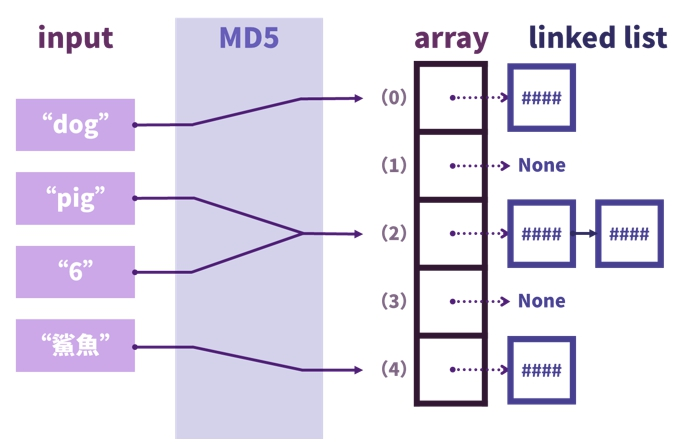

In [2]:
from IPython.display import Image
Image(filename="1575384306460.jpg", width=500, height=800)

- remove

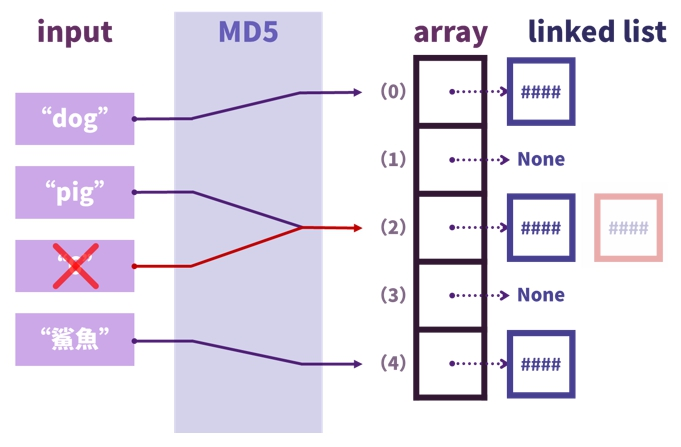

In [4]:
Image(filename="1575384353074.jpg", width=500, height=750)

- contains

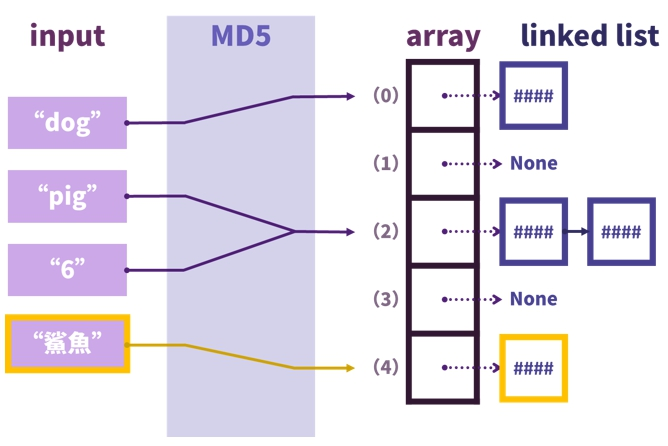

In [6]:
Image(filename="1575384391277.jpg", width=500, height=750)

### 參考資料

- [課程講義](https://docs.google.com/presentation/d/e/2PACX-1vT1HO9Nl475k2bR0l1x8_Tr4V5Wzx0BEqp9bpmHckvj8kTeJehhYVlOJUDVPhLQm6kjGCJ_sLMSBUw5/pub?start=false&loop=false&delayms=3000&slide=id.p)
- [課堂筆記](https://github.com/vanikk06/Data-structures-and-Algorithms/blob/master/week_11/README.md)
- 課堂live coding範例
- [白話的 Hash Table 簡介](https://blog.techbridge.cc/2017/01/21/simple-hash-table-intro/)
- [What is Hashing? Hash Functions Explained Simply](https://www.youtube.com/watch?v=2BldESGZKB8&feature=emb_logo)